## Observations and Insights 

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df= pd.merge(mouse_metadata,study_results, on ='Mouse ID', how='outer')
df.shape

# Display the data table for preview
print(df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [109]:
# Checking the number of mice.
mice_count = len(df["Mouse ID"].unique())
mice_count

249

In [113]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df=df.loc[df['Duplicated']==True]
mouse_ID = duplicate_df['Mouse ID'].unique()
df.drop(columns=['Duplicated'])
print('The Mouse ID with duplicated timepoint is '+ mouse_ID)

['The Mouse ID with duplicated timepoint is g989']


In [114]:
# Optional: Get all the data for the duplicate mouse ID. 



In [134]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean = df.drop_duplicates(subset=['Mouse ID','Timepoint'])
df_clean.shape
df_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicated
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False


In [118]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(df_clean['Mouse ID'].unique())
mice_count

249

## Summary Statistics

In [184]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary dataframe.

df_drug = df_clean.groupby('Drug Regimen')
mean_by_drug = df_drug['Tumor Volume (mm3)'].mean()
median_by_drug = df_drug['Tumor Volume (mm3)'].median()
var_by_drug = df_drug['Tumor Volume (mm3)'].var()
std_by_drug = df_drug['Tumor Volume (mm3)'].std()
sem_by_drug = df_drug['Tumor Volume (mm3)'].sem()
table_stats = pd.merge(mean_by_drug,median_by_drug, on='Drug Regimen')
table_stats=table_stats.rename(columns={'Tumor Volume (mm3)_x':'Mean','Tumor Volume (mm3)_y':'Median'})
table_stats = pd.merge(table_stats,var_by_drug, on='Drug Regimen')
table_stats=table_stats.rename(columns={'Tumor Volume (mm3)':'Variance'})
table_stats = pd.merge(table_stats,std_by_drug, on='Drug Regimen')
table_stats=table_stats.rename(columns={'Tumor Volume (mm3)':'Standard Deviation'})
table_stats = pd.merge(table_stats,sem_by_drug, on='Drug Regimen')
table_stats=table_stats.rename(columns={'Tumor Volume (mm3)':'Standard Error of the Mean'})

print(table_stats)
 



,count,unique,top,freq
Drug Regimen,,,,
Capomulin,230,1,Capomulin,230
Ceftamin,178,1,Ceftamin,178
Infubinol,178,1,Infubinol,178
Ketapril,188,1,Ketapril,188
Naftisol,186,1,Naftisol,186
Placebo,181,1,Placebo,181
Propriva,156,1,Propriva,156
Ramicane,228,1,Ramicane,228
Stelasyn,181,1,Stelasyn,181


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

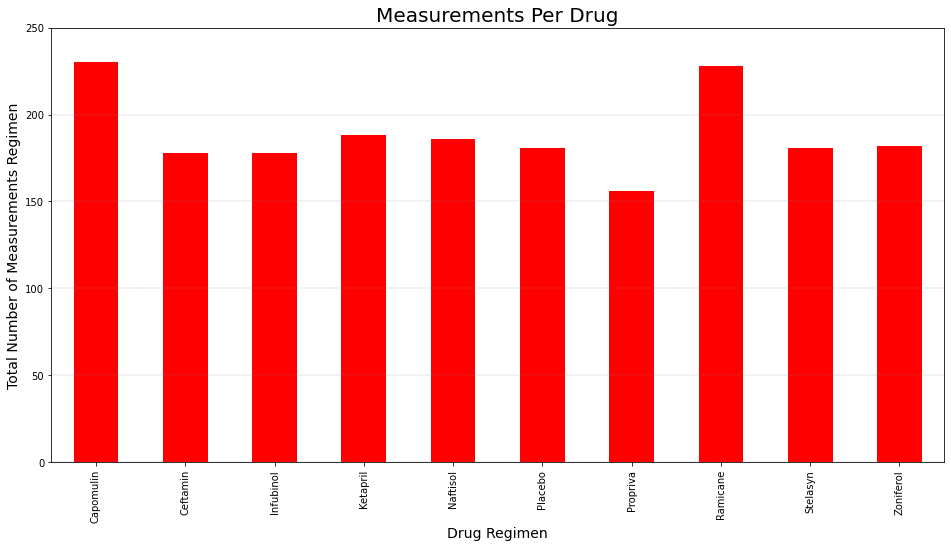

In [213]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_by_drug = df_drug['Tumor Volume (mm3)'].count()
count_by_drug.plot(kind='bar',color = 'r', figsize=(16,8))
plt.xlabel('Drug Regimen',fontsize=14)
plt.ylabel('Total Number of Measurements Regimen',fontsize=14)
plt.title('Measurements Per Drug',fontsize=20)
plt.ylim(0,250)
plt.grid(axis='y',color='grey', linestyle='--', linewidth=0.3)
plt.show()

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
